In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('data/Koeppen-Geiger-ASCII/Koeppen-Geiger-ASCII.txt', sep=' ')

/home/matchdt/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Lat,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Cls
count,0.0,0.0,0.0,34861.000000,53976.000000,7613.000000,26147.000000,33812.000000,24628.000000,3577.000000,218.000000,0.0
mean,NaN,NaN,NaN,-65.202583,45.126195,-67.843393,-3.769696,31.646886,45.032382,18.291515,5.713303,NaN
std,NaN,NaN,NaN,25.688764,22.622195,70.449543,112.049615,82.794375,38.599829,20.842776,2.939644,NaN
min,NaN,NaN,NaN,-89.750000,-9.750000,-179.750000,-179.750000,-159.250000,-85.750000,-9.750000,0.250000,NaN
25%,NaN,NaN,NaN,-83.750000,29.750000,-132.750000,-102.750000,-51.875000,21.250000,4.250000,3.250000,NaN
50%,NaN,NaN,NaN,-76.750000,48.750000,-103.250000,-53.750000,36.250000,46.250000,9.250000,6.250000,NaN
75%,NaN,NaN,NaN,-40.750000,63.750000,5.250000,125.750000,108.250000,76.250000,29.250000,8.250000,NaN
max,NaN,NaN,NaN,-10.250000,83.750000,9.750000,179.750000,179.750000,173.750000,99.750000,9.750000,NaN


In [58]:
df.columns = map(str.lower, df.columns)

In [64]:
df['lon'].isna().value_counts()

False    54444
True     37972
Name: lon, dtype: int64

In [56]:
df[df['lat']==36.25][df['lon']==40.75]

/home/matchdt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,lat,lon,cls


In [5]:
c = {'lat': [36.1, 36.2, 37.67, 37.88], 'lon': [45.07, 46.23, 47.1, 48.99]}
coords = pd.DataFrame(c)

In [6]:
coords

,lat,lon
0,36.10,45.07
1,36.20,46.23
2,37.67,47.10
3,37.88,48.99


In [9]:
indlat = np.abs(df['lat']-coords.at[0,'lat']).idxmin()

In [10]:
dfmasked = df[df['lat']==df.at[indlat,'lat']]

In [29]:
dfmasked.reset_index(drop=True, inplace=True)
dfmasked

,lat,lon,cls
0,36.25,-121.75,Csb
1,36.25,-121.25,Csb
2,36.25,-120.75,Csb
3,36.25,-120.25,BSk
4,36.25,-119.75,BSk
5,36.25,-119.25,BSk
6,36.25,-118.75,Csb
7,36.25,-118.25,Csb
8,36.25,-117.75,BSk
9,36.25,-117.25,BWk


In [50]:
y = np.array(np.abs(dfmasked['lon']-coords.at[0,'lon']))
x = np.linspace(0,len(y))
y

array([166.82, 166.32, 165.82, 165.32, 164.82, 164.32, 163.82, 163.32,
       162.82, 162.32, 161.82, 161.32, 160.82, 160.32, 159.82, 159.32,
       158.82, 158.32, 157.82, 157.32, 156.82, 156.32, 155.82, 155.32,
       154.82, 154.32, 153.82, 153.32, 152.82, 152.32, 151.82, 151.32,
       150.82, 150.32, 149.82, 149.32, 148.82, 148.32, 147.82, 147.32,
       146.82, 146.32, 145.82, 145.32, 144.82, 144.32, 143.82, 143.32,
       142.82, 142.32, 141.82, 141.32, 140.82, 140.32, 139.82, 139.32,
       138.82, 138.32, 137.82, 137.32, 136.82, 136.32, 135.82, 135.32,
       134.82, 134.32, 133.82, 133.32, 132.82, 132.32, 131.82, 131.32,
       130.82, 130.32, 129.82, 129.32, 128.82, 128.32, 127.82, 127.32,
       126.82, 126.32, 125.82, 125.32, 124.82, 124.32, 123.82, 123.32,
       122.82, 122.32, 121.82, 121.32, 120.82,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
      

ValueError: x and y must have same first dimension, but have shapes (50,) and (323,)

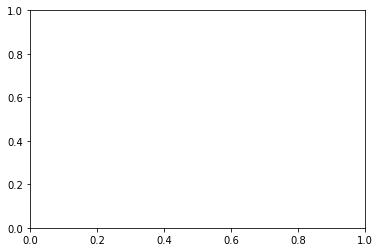

In [46]:
plt.plot(x,y)

In [33]:
np.abs(dfmasked['lon']-coords.at[0,'lon'])

0      166.82
1      166.32
2      165.82
3      165.32
4      164.82
5      164.32
6      163.82
7      163.32
8      162.82
9      162.32
10     161.82
11     161.32
12     160.82
13     160.32
14     159.82
15     159.32
16     158.82
17     158.32
18     157.82
19     157.32
20     156.82
21     156.32
22     155.82
23     155.32
24     154.82
25     154.32
26     153.82
27     153.32
28     152.82
29     152.32
        ...  
293     70.18
294     70.68
295     71.18
296     71.68
297     72.18
298     72.68
299     73.18
300     73.68
301     74.18
302     74.68
303     75.18
304     75.68
305     81.18
306     81.68
307     82.18
308     82.68
309     83.18
310     83.68
311     84.18
312     88.18
313     91.18
314     91.68
315     92.18
316     92.68
317     93.18
318     93.68
319     94.18
320     94.68
321     95.18
322     95.68
Name: lon, Length: 323, dtype: float64

In [32]:
indlon = np.abs(dfmasked['lon']-coords.at[0,'lon']).idxmin()
indlon

263

In [12]:
cls = dfmasked.at[indlon,'cls']

In [13]:
cls

'Dwc'

In [16]:
dfmasked.iloc[indlon]

IndexError: single positional indexer is out-of-bounds